In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcdefaults()

In [127]:
# Change data path (relative path wasn't working)
data_folder = 'D:/Master/ADA2023/ada-2023-project-lovelace/Data/MovieSummaries/'

movie_column_names = [
    'wiki_movie_ID',
    'fb_movie_ID',
    'movie_name',
    'release_date',
    'box_office',
    'runtime',
    'languages',
    'countries',
    'genres'
]

movie = pd.read_csv(data_folder + 'movie.metadata.tsv', sep='\t', names=movie_column_names)

In [128]:
movie.head()

,wiki_movie_ID,fb_movie_ID,movie_name,release_date,box_office,runtime,languages,countries,genres
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}"


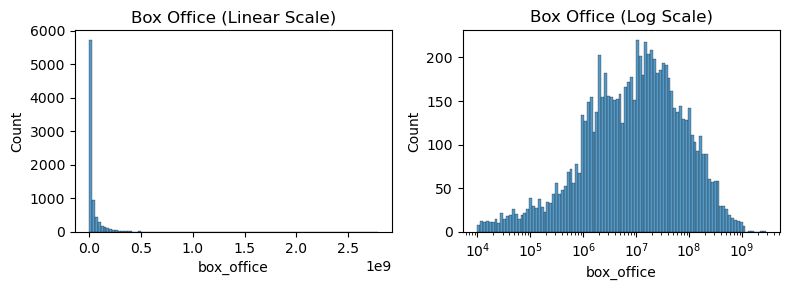

In [129]:
fig, ax = plt.subplots(1, 2, figsize=(8, 3))

sns.histplot(data=movie, x="box_office", bins=100, ax=ax[0])
ax[0].set_title("Box Office (Linear Scale)")

sns.histplot(data=movie, x="box_office", bins=100, log_scale=True, ax=ax[1])
ax[1].set_title("Box Office (Log Scale)")

plt.tight_layout()
plt.show()


In [130]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81741 entries, 0 to 81740
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   wiki_movie_ID  81741 non-null  int64  
 1   fb_movie_ID    81741 non-null  object 
 2   movie_name     81741 non-null  object 
 3   release_date   74839 non-null  object 
 4   box_office     8401 non-null   float64
 5   runtime        61291 non-null  float64
 6   languages      81741 non-null  object 
 7   countries      81741 non-null  object 
 8   genres         81741 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 5.6+ MB


In [131]:
movie['box_office'].isna().sum() / movie.shape[0] * 100
# Pas mal de donnee qui manque pour box office

89.72241592346558

In [132]:
movie.describe()
# euh, le max de runtime est tres bizarre

,wiki_movie_ID,box_office,runtime
count,8.174100e+04,8.401000e+03,6.129100e+04
mean,1.740784e+07,4.799363e+07,1.118192e+02
std,1.098791e+07,1.121753e+08,4.360070e+03
min,3.300000e+02,1.000000e+04,0.000000e+00
25%,7.323695e+06,2.083193e+06,8.100000e+01
50%,1.777899e+07,1.063969e+07,9.300000e+01
75%,2.715573e+07,4.071696e+07,1.060000e+02
max,3.750192e+07,2.782275e+09,1.079281e+06


In [139]:
len(movie.query('runtime>400'))/len(movie)*100
# en effet, il y a bcp de valeurs tres grandes

0.08074283407347597

In [121]:
movie.query('runtime<250', inplace=True) # on drop les plus de 4 heures?
movie.query('runtime>20', inplace=True)

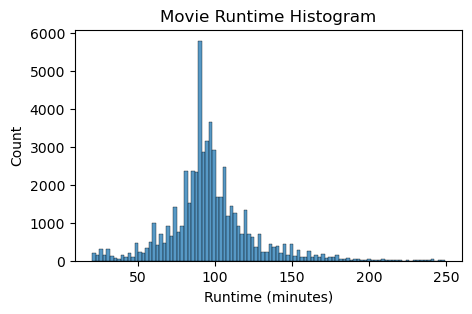

In [122]:
plt.figure(figsize=(5, 3))
sns.histplot(data=movie, x="runtime", bins=100)
plt.title("Movie Runtime Histogram")
plt.xlabel("Runtime (minutes)")
plt.show()

In [140]:
movie.genres.unique()
# un peu chiant le format

array(['{"/m/01jfsb": "Thriller", "/m/06n90": "Science Fiction", "/m/03npn": "Horror", "/m/03k9fj": "Adventure", "/m/0fdjb": "Supernatural", "/m/02kdv5l": "Action", "/m/09zvmj": "Space western"}',
       '{"/m/02n4kr": "Mystery", "/m/03bxz7": "Biographical film", "/m/07s9rl0": "Drama", "/m/0hj3n01": "Crime Drama"}',
       '{"/m/0lsxr": "Crime Fiction", "/m/07s9rl0": "Drama"}', ...,
       '{"/m/0lsxr": "Crime Fiction", "/m/01jfsb": "Thriller", "/m/01z4y": "Comedy", "/m/0fdjb": "Supernatural"}',
       '{"/m/01z02hx": "Sports", "/m/0lsxr": "Crime Fiction", "/m/02kdv5l": "Action", "/m/07s9rl0": "Drama"}',
       '{"/m/06n90": "Science Fiction", "/m/0gw5n2f": "Japanese Movies", "/m/03k9fj": "Adventure", "/m/0hcr": "Animation", "/m/02hmvc": "Short Film", "/m/0jxy": "Anime", "/m/07s9rl0": "Drama"}'],
      dtype=object)